In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
table_1 = pd.read_csv('../../데이터/Table/table_1.csv')
table_2 = pd.read_csv('../../데이터/Table/table_2.csv')
table_3 = pd.read_csv('../../데이터/Table/table_3.csv')

table_merge = pd.merge(table_1, table_3, how='left', on='aid')
table_merge = pd.merge(table_merge, table_2, how='left', on='did')

table_merge['gu'] = table_merge['location'].str.split().str[1]
table_merge['dong'] = table_merge['location'].str.split().str[2]

### 아파트 실거래가

In [5]:
# 구별 평균, 표준편차
gu = table_merge.groupby('gu')['price'].agg(['mean', 'std'])
# 구별 평균의 평균
gu_mean_mean = gu['mean'].mean()
# 구별 표준편차의 평균
gu_std_mean = gu['std'].mean()

print(gu_mean_mean, gu_std_mean)

62619.943741345465 26850.41121793319


In [6]:
# 동별 평균, 표준편차
dong = table_merge.groupby(by='dong')['price'].agg(['mean', 'std'])
# 동별 평균의 평균
dong_mean_mean = dong['mean'].mean()
# 동별 표준편차의 평균
dong_std_mean = dong['std'].mean() - 3000

print(dong_mean_mean, dong_std_mean)

64377.87688959049 21682.241935446007


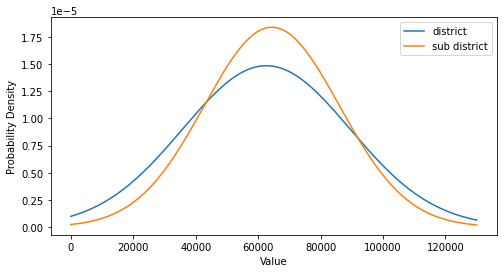

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

x = np.linspace(0, 130000, 1000)
y_gu = norm.pdf(x, gu_mean_mean, gu_std_mean)
y_dong = norm.pdf(x, dong_mean_mean, dong_std_mean)

plt.figure(figsize=(8, 4))
plt.plot(x, y_gu, label='district')
plt.plot(x, y_dong, label='sub district')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.savefig('../../데이터/Figure/fig_1.jpg')

### 경제지표

In [9]:
table_2['date'] = pd.to_datetime(table_2[['year', 'month']].assign(DAY=1))

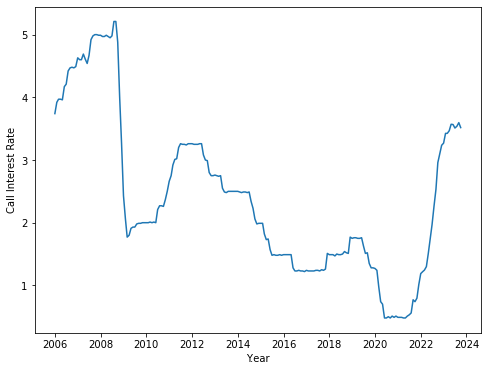

In [11]:
plt.figure(figsize=(8, 6))
plt.plot(table_2['date'], table_2['call_rate'])
plt.xlabel('Y.ear')
plt.ylabel('Call Interest Rate')
plt.savefig('../../데이터/Figure/fig_2.jpg')

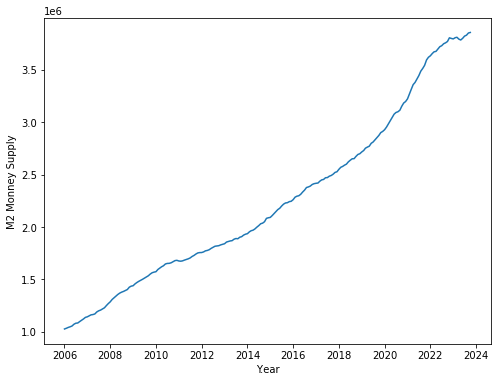

In [10]:
plt.figure(figsize=(8, 6))
plt.plot(table_2['date'], table_2['m2'])
plt.xlabel('Y.ear')
plt.ylabel('M2 Monney Supply')
plt.savefig('../../데이터/Figure/fig_3.jpg')

### 히스토그램

In [ ]:
def load_losses_from_file(file_path):
    with open(file_path, 'r') as file:
        losses = [float(line.strip()) for line in file]
    return losses

lstm_losses = load_losses_from_file('../../데이터/Checkpoint/lstm/default/lstm_lr_0.0001_batch_64_hid_1024_sub_True_emb_1024_ws_12_epochs_10_val_losses.txt')
gru_losses = load_losses_from_file('../../데이터/Checkpoint/gru/default/gru_lr_0.0001_batch_64_hid_1024_sub_True_emb_1024_ws_12_epochs_9_val_losses.txt')
transformer_losses = load_losses_from_file('../../데이터/Checkpoint/transformer/default/transformer_lr_0.0001_batch_64_sub_True_emb_1024_ws_12_epochs_15_val_losses.txt')
transformer_att_losses = load_losses_from_file('../../데이터/Checkpoint/transformer/attention/default/transformer_attention_lr_0.0001_batch_64_sub_True_emb_1024_ws_12_epochs_5_val_losses.txt')

losses_data = {
    'LSTM': lstm_losses,
    'GRU': gru_losses,
    'TSA Net': transformer_losses,
    'TSA-GA Net': transformer_att_losses
}

fig, axs = plt.subplots(1, 4, figsize=(15, 4), sharey=True)

for ax, (title, data) in zip(axs, losses_data.items()):
    ax.hist(data, bins=30, density=True, color='white', alpha=0.5)
    
    mu, std = norm.fit(data)
    xmin, xmax = ax.get_xlim()
    x = np.linspace(0, 4)
    p = norm.pdf(x, mu, std)
    
    ax.plot(x, p, 'k', linewidth=2, color='orange')
    ax.fill_between(x, p, color='orange', alpha=0.5)
    
    ax.axvline(mu, color='k', linestyle='dashed', linewidth=1)
    ax.text(mu + 0.2, max(p) + 0.3, f'mean = {mu:.2f}', color='k')
    
    ax.set_title(title)
    ax.set_xlabel('General Error (R^2_p)')

    ax.set_ylim(0, 10)

axs[0].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### 로스 라인 그래프

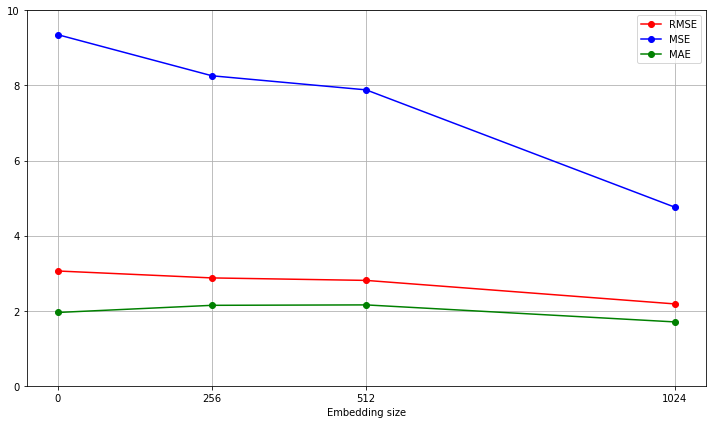

In [3]:
embedding_sizes = [0, 256, 512, 1024]
embedding_rmse_values = [3.0584, 2.8738, 2.8076, 2.1814]
embedding_mse_values = [9.3541, 8.2586, 7.8828, 4.7584]
embedding_mae_values = [1.9533, 2.1438, 2.1551, 1.7017]

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(embedding_sizes, embedding_rmse_values, 'ro-', label='RMSE')
ax.plot(embedding_sizes, embedding_mse_values, 'bo-', label='MSE')
ax.plot(embedding_sizes, embedding_mae_values, 'go-', label='MAE')
ax.set_xlabel('Embedding size')
ax.legend()
ax.grid(True)
ax.set_xticks(embedding_sizes)
ax.set_ylim(0, 10)
fig.tight_layout()
fig.savefig('../../데이터/Figure/fig_4.jpg')


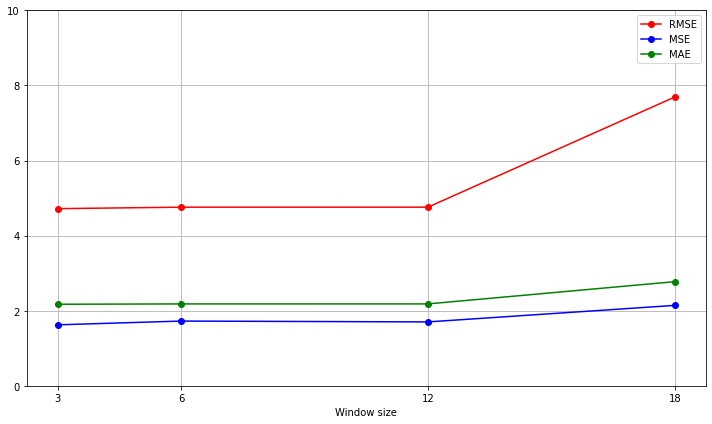

In [4]:
window_sizes = [3, 6, 12, 18]
window_mae_values = [2.1724, 2.1812, 2.1814, 2.7736]
window_rmse_values = [4.7191, 4.7578, 4.7584, 7.6931]
window_mse_values = [1.6243, 1.7245, 1.7017, 2.1420]

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(window_sizes, window_rmse_values, 'ro-', label='RMSE')
ax.plot(window_sizes, window_mse_values, 'bo-', label='MSE')
ax.plot(window_sizes, window_mae_values, 'go-', label='MAE')
ax.set_xlabel('Window size')
ax.legend()
ax.grid(True)
ax.set_xticks(window_sizes)
ax.set_ylim(0, 10)
fig.tight_layout()
fig.savefig('../../데이터/Figure/fig_5.jpg')

/var/folders/xj/_swws2td1j333fqkjhr5tmjr0000gn/T/ipykernel_12320/3213226511.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(model)


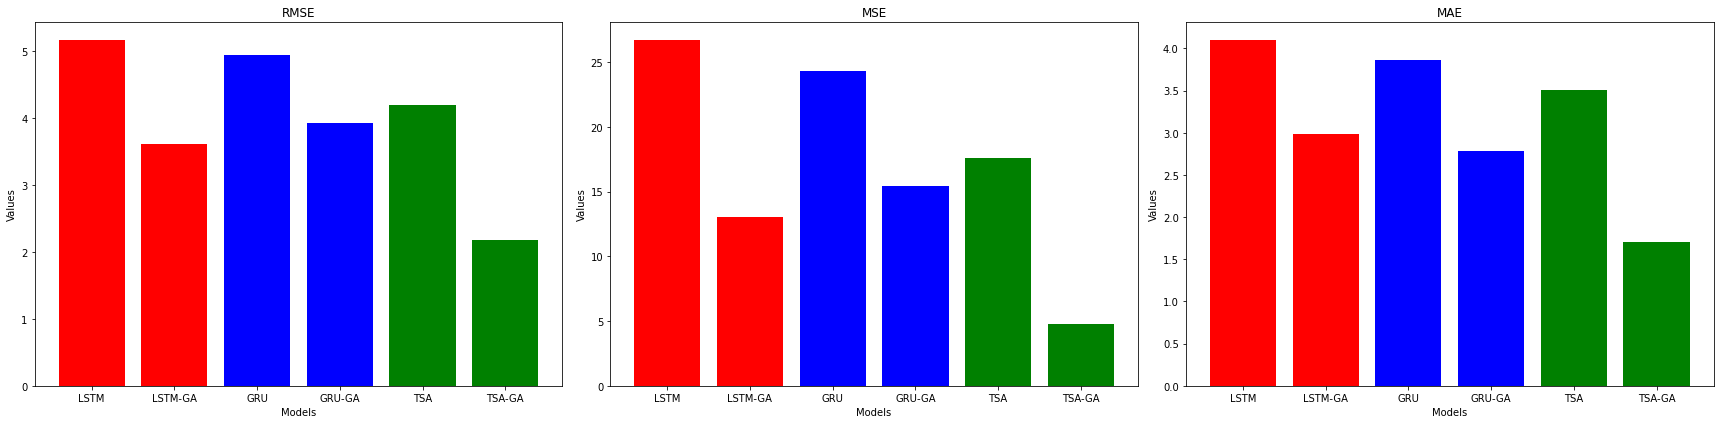

In [13]:
import matplotlib.pyplot as plt
import numpy as np

model = ['LSTM', 'LSTM-GA', 'GRU', 'GRU-GA', 'TSA', 'TSA-GA']
rmse = [5.1713, 3.6073, 4.9356, 3.9315, 4.1943, 2.1814]
mse = [26.7419, 13.0128, 24.3597, 15.4565, 17.5922, 4.7584]
mae = [4.1029, 2.9851, 3.8586, 2.7812, 3.5029, 1.7017]

fig, ax = plt.subplots(1, 3, figsize=(24, 6))

data = [rmse, mse, mae]
titles = ['RMSE', 'MSE', 'MAE']
for i in range(3):
    ax[i].bar(model, data[i], color=['red','red','blue','blue','green','green'])
    ax[i].set_title(titles[i])
    ax[i].set_xlabel('Models')
    ax[i].set_ylabel('Values')
    ax[i].set_xticklabels(model)

fig.tight_layout()
fig.savefig('../../데이터/Figure/fig_6.jpg')